In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('kc_house_data.csv')

# Exploratory Data Analysis

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
df.describe().transpose()

count          mean           std           min  \
id             21597.0  4.580474e+09  2.876736e+09  1.000102e+06   
price          21597.0  5.402966e+05  3.673681e+05  7.800000e+04   
bedrooms       21597.0  3.373200e+00  9.262989e-01  1.000000e+00   
bathrooms      21597.0  2.115826e+00  7.689843e-01  5.000000e-01   
sqft_living    21597.0  2.080322e+03  9.181061e+02  3.700000e+02   
sqft_lot       21597.0  1.509941e+04  4.141264e+04  5.200000e+02   
floors         21597.0  1.494096e+00  5.396828e-01  1.000000e+00   
waterfront     21597.0  7.547345e-03  8.654900e-02  0.000000e+00   
view           21597.0  2.342918e-01  7.663898e-01  0.000000e+00   
condition      21597.0  3.409825e+00  6.505456e-01  1.000000e+00   
grade          21597.0  7.657915e+00  1.173200e+00  3.000000e+00   
sqft_above     21597.0  1.788597e+03  8.277598e+02  3.700000e+02   
sqft_basement  21597.0  2.917250e+02  4.426678e+02  0.000000e+00   
yr_built       21597.0  1.971000e+03  2.937523e+01  1.900000e+03   
yr_renovated   21597.0  8.446479e+01  4.018214e+02  0.000000e+00   
zipcode        21597.0  9.807795e+04  5.351307e+01  9.800100e+04   
lat            21597.0  4.756009e+01  1.385518e-01  4.715590e+01   
long           21597.0 -1.222140e+02  1.407235e-01 -1.225190e+02   
sqft_living15  21597.0  1.986620e+03  6.852305e+02  3.990000e+02   
sqft_lot15     21597.0  1.275828e+04  2.727444e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.220000e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.430000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068500e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747110e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222310e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

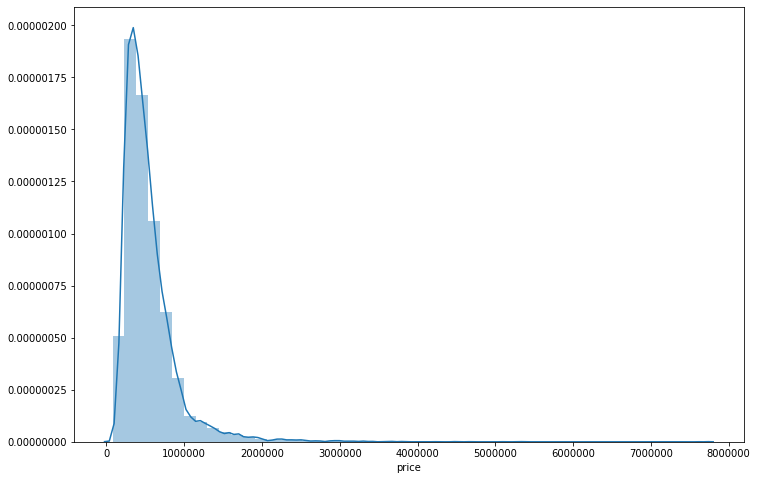

In [6]:
plt.figure(figsize = (12,8))
sns.distplot(df['price'])

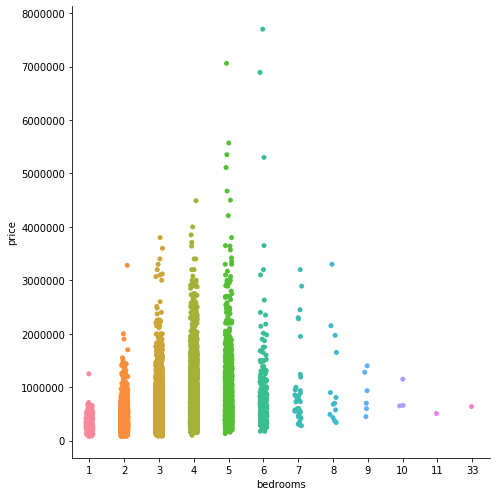

In [7]:
sns.catplot(x = 'bedrooms' , y = 'price' , data = df , height = 7)

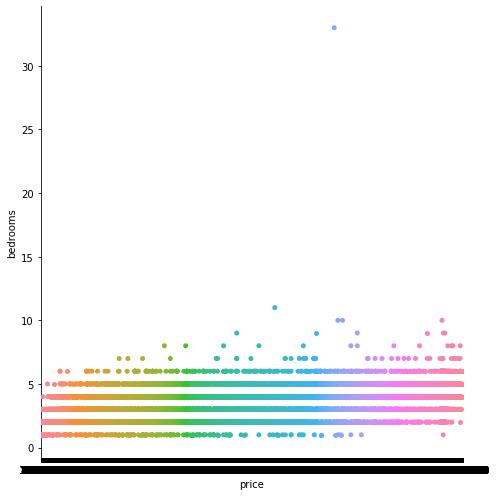

In [8]:
sns.catplot(x = 'price' , y = 'bedrooms' , data = df , height = 7)

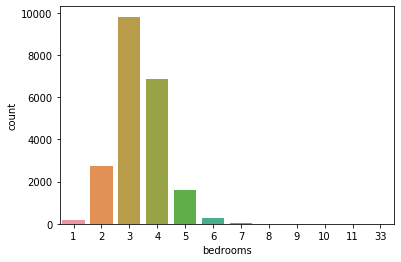

In [9]:
sns.countplot(df['bedrooms'])

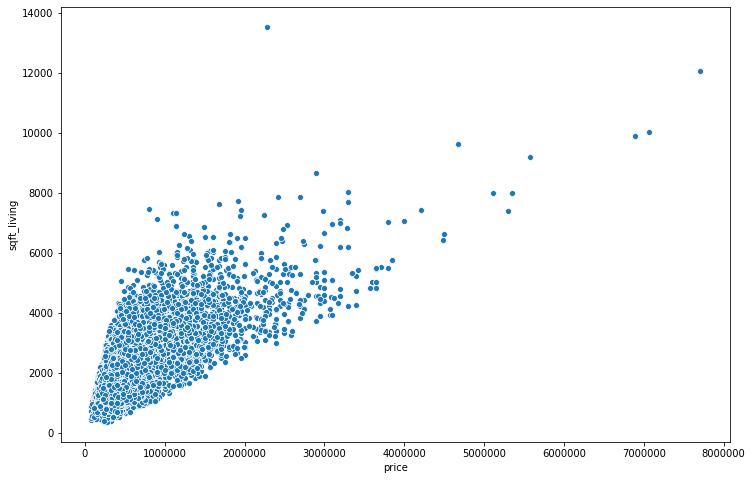

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'price' , y = 'sqft_living' , data = df)

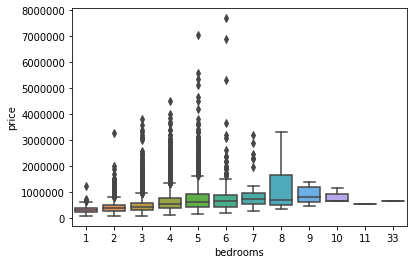

In [11]:
sns.boxplot(x='bedrooms',y='price',data=df)

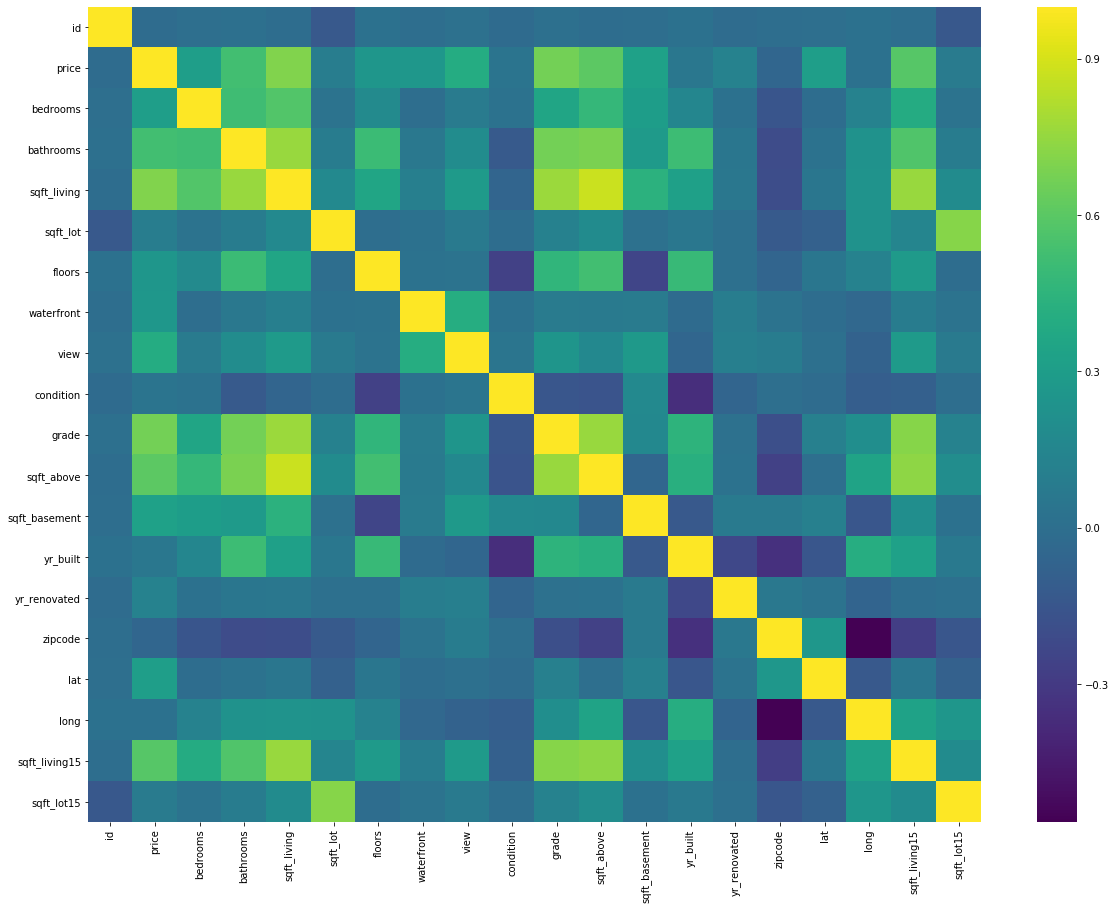

In [12]:
plt.figure(figsize = (20 , 15))
sns.heatmap(df.corr() , cmap = 'viridis')

### Geographical Properties

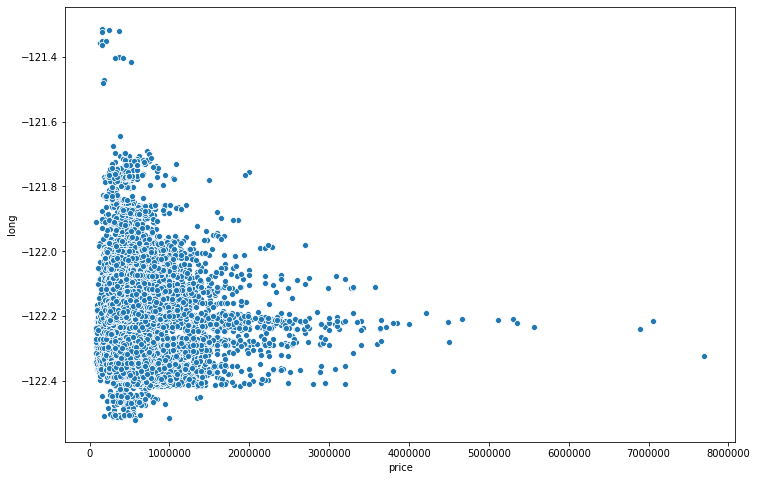

In [13]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

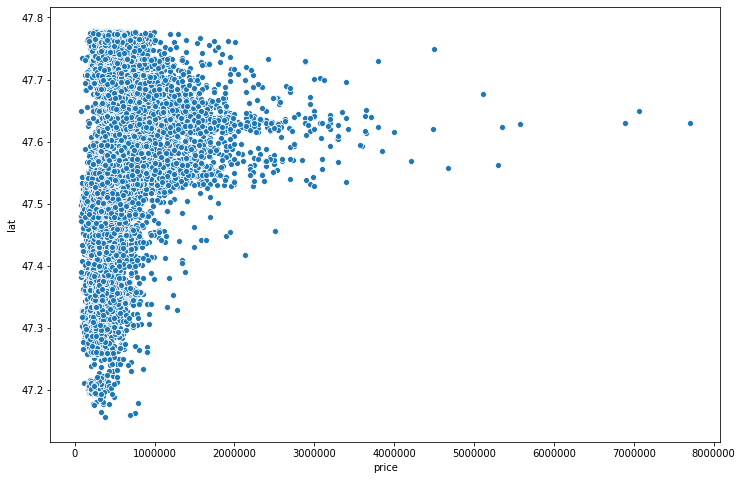

In [14]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

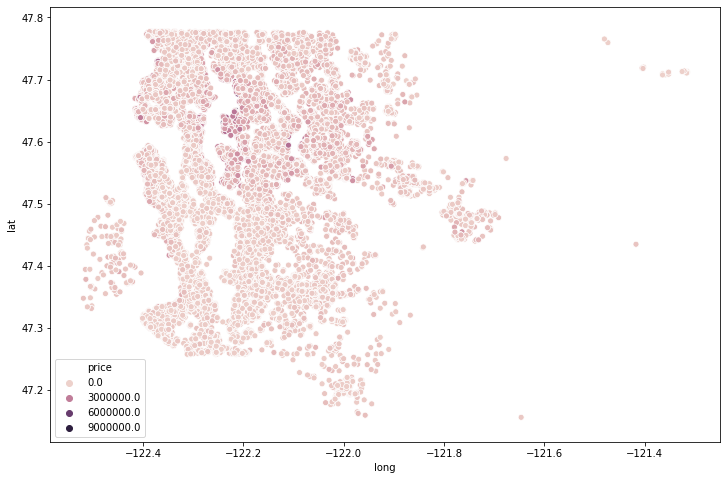

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long' , y = 'lat' , data = df , hue = 'price')

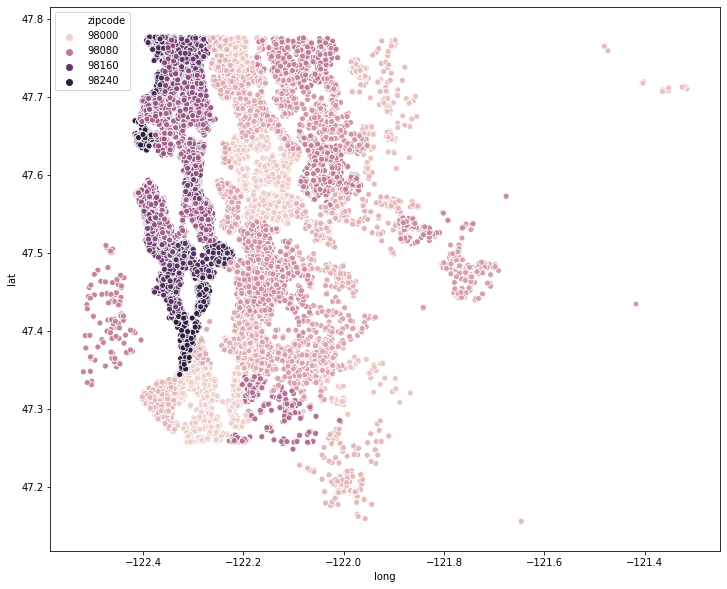

In [16]:
plt.figure(figsize=(12 , 10))
sns.scatterplot(x='long' , y = 'lat' , data = df , hue = 'zipcode')

In [17]:
df.sort_values('price' , ascending=False).head(20)

id        date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020  10/13/2014  7700000.0         6       8.00        12050   
3910   9808700762   6/11/2014  7060000.0         5       4.50        10040   
9245   9208900037   9/19/2014  6890000.0         6       7.75         9890   
4407   2470100110    8/4/2014  5570000.0         5       5.75         9200   
1446   8907500070   4/13/2015  5350000.0         5       5.00         8000   
1313   7558700030   4/13/2015  5300000.0         6       6.00         7390   
1162   1247600105  10/20/2014  5110000.0         5       5.25         8010   
8085   1924059029   6/17/2014  4670000.0         5       6.75         9640   
2624   7738500731   8/15/2014  4500000.0         5       5.50         6640   
8629   3835500195   6/18/2014  4490000.0         4       3.00         6430   
12358  6065300370    5/6/2015  4210000.0         5       6.00         7440   
4145   6447300265  10/14/2014  4000000.0         4       5.50         7080   
2083   8106100105  11/14/2014  3850000.0         4       4.25         5770   
7028    853200010    7/1/2014  3800000.0         5       5.50         7050   
19002  2303900100   9/11/2014  3800000.0         3       4.25         5510   
16288  7397300170   5/30/2014  3710000.0         4       3.50         5550   
18467  4389201095   5/11/2015  3650000.0         5       3.75         5020   
6502   4217402115   4/21/2015  3650000.0         6       4.75         5480   
15241  2425049063   9/11/2014  3640000.0         4       3.25         4830   
19133  3625049042  10/11/2014  3640000.0         5       6.00         5490   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
7245      27600     2.5           0     3  ...     13        8570   
3910      37325     2.0           1     2  ...     11        7680   
9245      31374     2.0           0     4  ...     13        8860   
4407      35069     2.0           0     0  ...     13        6200   
1446      23985     2.0           0     4  ...     12        6720   
1313      24829     2.0           1     4  ...     12        5000   
1162      45517     2.0           1     4  ...     12        5990   
8085      13068     1.0           1     4  ...     12        4820   
2624      40014     2.0           1     4  ...     12        6350   
8629      27517     2.0           0     0  ...     12        6430   
12358     21540     2.0           0     0  ...     12        5550   
4145      16573     2.0           0     0  ...     12        5760   
2083      21300     2.0           1     4  ...     11        5770   
7028      42840     1.0           0     2  ...     13        4320   
19002     35000     2.0           0     4  ...     13        4910   
16288     28078     2.0           0     2  ...     12        3350   
18467      8694     2.0           0     1  ...     12        3970   
6502      19401     1.5           1     4  ...     11        3910   
15241     22257     2.0           1     4  ...     11        4830   
19133     19897     2.0           0     0  ...     12        5490   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
7245            3480      1910          1987    98102  47.6298 -122.323   
3910            2360      1940          2001    98004  47.6500 -122.214   
9245            1030      2001             0    98039  47.6305 -122.240   
4407            3000      2001             0    98039  47.6289 -122.233   
1446            1280      2009             0    98004  47.6232 -122.220   
1313            2390      1991             0    98040  47.5631 -122.210   
1162            2020      1999             0    98033  47.6767 -122.211   
8085            4820      1983          2009    98040  47.5570 -122.210   
2624             290      2004             0    98155  47.7493 -122.280   
8629               0      2001             0    98004  47.6208 -122.219   
12358           1890      2003             0    98006  47.5692 -122.189   
4145            1320      

In [18]:
len(df)*(0.01)

215.97

In [19]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

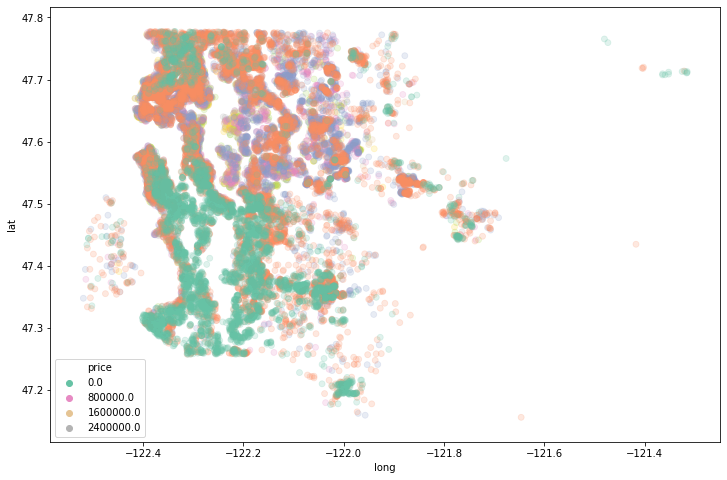

In [20]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'long' , y = 'lat',
                data = non_top_1_perc , hue = 'price',
                palette = 'Set2' , edgecolor = None , alpha = 0.2)

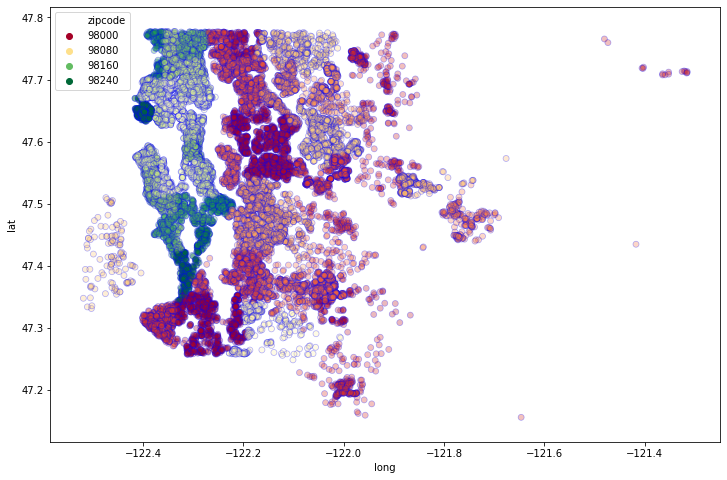

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x = 'long' , y = 'lat',
                data = non_top_1_perc , hue = 'zipcode',
                palette = 'RdYlGn' , edgecolor = 'blue' , alpha = 0.3)

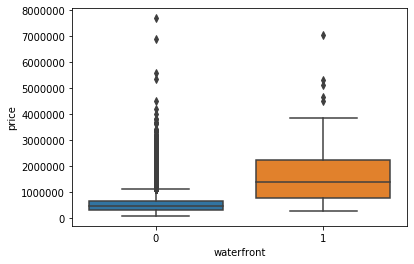

In [22]:
sns.boxplot(x = 'waterfront' , y = 'price' , data = df)

## Working with Feature Data

In [23]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [25]:
df = df.drop('id' , axis = 1)

In [26]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  10/13/2014  221900.0         3       1.00         1180      5650     1.0   
1   12/9/2014  538000.0         3       2.25         2570      7242     2.0   
2   2/25/2015  180000.0         2       1.00          770     10000     1.0   
3   12/9/2014  604000.0         4       3.00         1960      5000     1.0   
4   2/18/2015  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

### Feature Engineering from Date

In [27]:
df['date'] = pd.to_datetime(df['date'])
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [28]:
df['month'] = df['date'].apply(lambda date:date.month)

In [29]:
df['year'] = df['date'].apply(lambda date:date.year)
df['year']

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21592    2014
21593    2015
21594    2014
21595    2015
21596    2014
Name: year, Length: 21597, dtype: int64

In [30]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

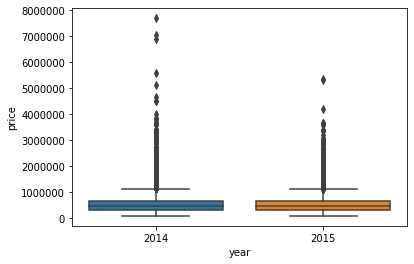

In [31]:
sns.boxplot(x='year',y='price',data=df)

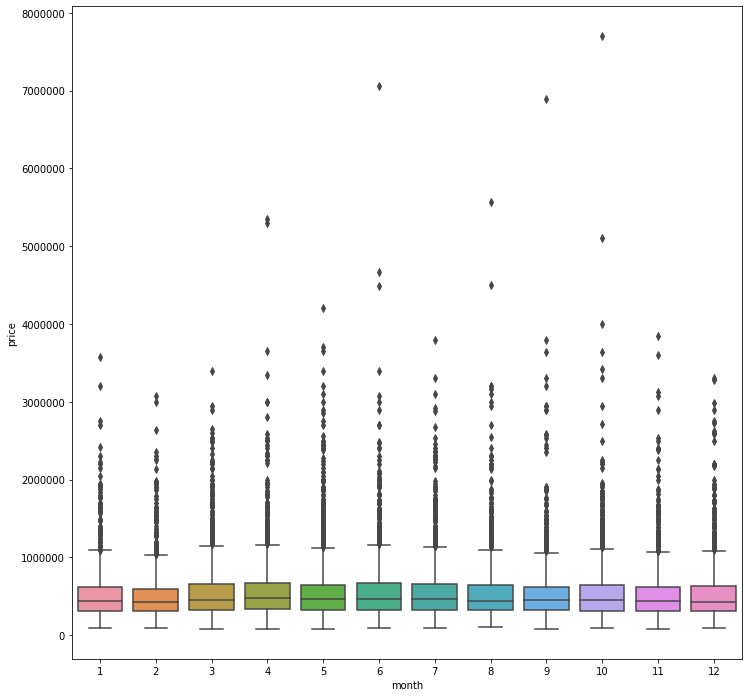

In [32]:
plt.figure(figsize = (12,12))
sns.boxplot(x='month',y='price',data=df)

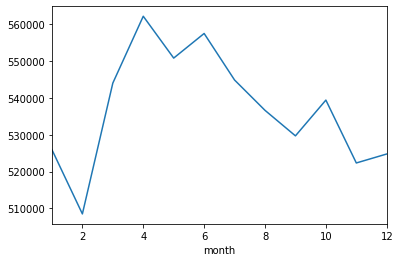

In [33]:
df.groupby('month').mean()['price'].plot()

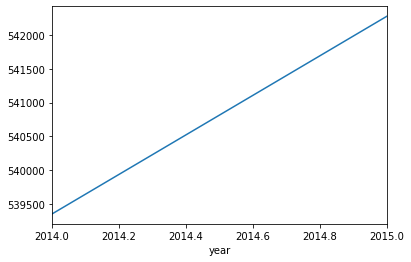

In [34]:
df.groupby('year').mean()['price'].plot()

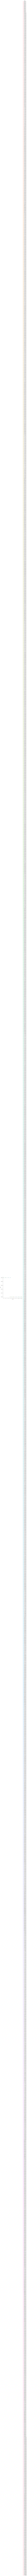

In [35]:
sns.catplot(x = 'month' , y = 'year' , hue = 'price' , data = df , height = 7)

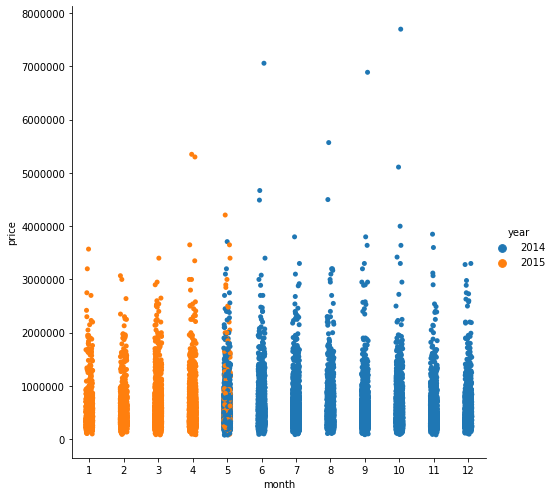

In [36]:
sns.catplot(x = 'month' , y = 'price' , hue = 'year' , data = df , height = 7)

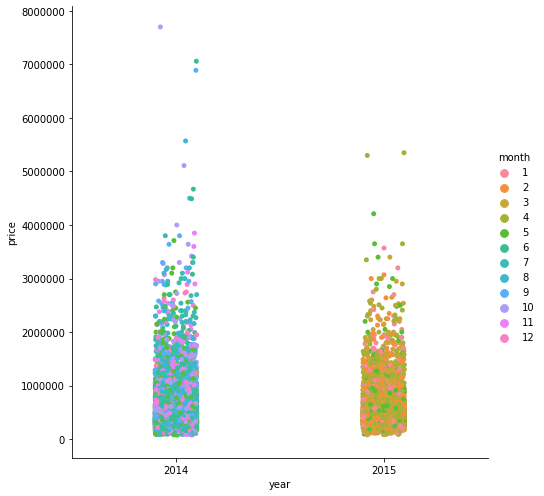

In [37]:
sns.catplot(x = 'year' , y = 'price' , hue = 'month' , data = df , height = 7)

In [38]:
df = df.drop('date' , axis = 1)

In [39]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [40]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [41]:
df = df.drop('zipcode',axis=1)

In [42]:
df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

       lat     long  sqft_living15  sqft_lot15  month  year  
0  47.5112 -122.257           1340        5650     10  2014  
1  47.7210 -122.319           1690        7639     12  2014  
2  47.7379 -122.233           2720        8062      2  2015  
3  47.5208 -122.393           1360        5000     12  2014  
4  47.6168 -122.045           1800        7503      2  2015

In [43]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [44]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [45]:
X = df.drop('price',axis=1)
y = df['price']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [48]:
X_test

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
15832         2       1.00          780      8271     1.0           0     0   
6001          4       2.75         2040      8996     1.0           0     0   
4256          3       2.00         1580      4010     1.0           0     0   
15849         2       1.00          930      6380     1.0           0     0   
4088          3       1.50         1470      9570     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
16591         4       3.25         3410     34939     2.0           0     0   
17052         3       1.50         1210      5200     1.0           0     0   
10587         2       1.00          910      4800     1.0           0     0   
11204         4       1.75         2520      7200     1.0           0     2   
1679          4       2.50         3040      7000     2.0           0     0   

       condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
15832          4      6         780              0      1924             0   
6001           4      8        1260            780      1974             0   
4256           4      7         790            790      1909             0   
15849          4      7         930              0      1940             0   
4088           3      7        1280            190      1941             0   
...          ...    ...         ...            ...       ...           ...   
16591          4      9        2470            940      1992             0   
17052          5      6        1210              0      1969             0   
10587          4      7         910              0      1923             0   
11204          5      7        1260           1260      1955             0   
1679           3      9        3040              0      2001             0   

           lat     long  sqft_living15  sqft_lot15  month  year  
15832  47.7000 -122.300           2220        8271      8  2014  
6001   47.6660 -122.185           2470        9180     10  2014  
4256   47.6769 -122.371           1350        5350     11  2014  
15849  47.6915 -122.321           1180        6380      7  2014  
4088   47.7032 -122.306           1390        9570      4  2015  
...        ...      ...            ...         ...    ...   ...  
16591  47.4590 -122.003           2450       39045      4  2015  
17052  47.3615 -122.087           1120        5200      2  2015  
10587  47.5536 -122.377           1450        5000     12  2014  
11204  47.4835 -122.192           2360        7300      2  2015  
1679   47.5934 -122.244           2320       17511      6  2014  

[6480 rows x 19 columns]

### Scaling

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
scaler = MinMaxScaler()

In [51]:
X_train= scaler.fit_transform(X_train)

In [52]:
X_test = scaler.transform(X_test)

In [53]:
X_train.shape

(15117, 19)

In [54]:
X_test.shape

(6480, 19)

## Creating a Model

In [55]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

## Training the Model

In [56]:
model.fit(x = X_train , y = y_train.values,
          validation_data = (X_test , y_test.values),
          batch_size = 128 , epochs = 400)

Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 4s 242us/sample - loss: 430245457198.4515 - val_loss: 418940416131.4766
Epoch 2/400
15117/15117 [==============================] - 1s 79us/sample - loss: 429141776490.3492 - val_loss: 414738376294.4000
Epoch 3/400
15117/15117 [==============================] - 1s 54us/sample - loss: 410592813408.2392 - val_loss: 371100282445.1161
Epoch 4/400
15117/15117 [==============================] - 1s 66us/sample - loss: 317945376632.7943 - val_loss: 225692828982.9926
Epoch 5/400
15117/15117 [==============================] - 1s 84us/sample - loss: 158137403000.7435 - val_loss: 103083666474.9827
Epoch 6/400
15117/15117 [==============================] - 1s 67us/sample - loss: 100138172419.2514 - val_loss: 94570118510.6173
Epoch 7/400
15117/15117 [==============================] - 1s 68us/sample - loss: 96810948453.1502 - val_loss: 92977975215.0913
Epoch 8/400
15117/15117 [==================

15117/15117 [==============================] - 1s 52us/sample - loss: 37469406164.1733 - val_loss: 36169335188.5432
Epoch 65/400
15117/15117 [==============================] - 1s 51us/sample - loss: 37302840602.1978 - val_loss: 35981791095.4667
Epoch 66/400
15117/15117 [==============================] - 1s 52us/sample - loss: 37137451063.9518 - val_loss: 35812237787.3383
Epoch 67/400
15117/15117 [==============================] - 1s 54us/sample - loss: 36963242299.6605 - val_loss: 35942035182.9333
Epoch 68/400
15117/15117 [==============================] - 1s 52us/sample - loss: 36808384846.3902 - val_loss: 35519052564.8593
Epoch 69/400
15117/15117 [==============================] - 1s 57us/sample - loss: 36635457008.3186 - val_loss: 35390436400.0395
Epoch 70/400
15117/15117 [==============================] - 1s 81us/sample - loss: 36505054544.5917 - val_loss: 35221124715.4568
Epoch 71/400
15117/15117 [==============================] - 1s 54us/sample - loss: 36366883070.8993 - val_loss

15117/15117 [==============================] - 1s 59us/sample - loss: 32798114041.2770 - val_loss: 31463773934.9333
Epoch 128/400
15117/15117 [==============================] - 1s 59us/sample - loss: 32762985008.7377 - val_loss: 31365127590.2420
Epoch 129/400
15117/15117 [==============================] - 1s 63us/sample - loss: 32760312385.4013 - val_loss: 31408140025.0469
Epoch 130/400
15117/15117 [==============================] - 1s 68us/sample - loss: 32721961605.1396 - val_loss: 31353397086.1827
Epoch 131/400
15117/15117 [==============================] - 1s 58us/sample - loss: 32718865661.2227 - val_loss: 31292415433.6395
Epoch 132/400
15117/15117 [==============================] - 1s 59us/sample - loss: 32652555381.0179 - val_loss: 31343194870.5185
Epoch 133/400
15117/15117 [==============================] - 1s 58us/sample - loss: 32627037451.9050 - val_loss: 31218150018.2123
Epoch 134/400
15117/15117 [==============================] - 1s 77us/sample - loss: 32578740521.3712 - v

15117/15117 [==============================] - 1s 74us/sample - loss: 31377992240.7716 - val_loss: 29609511448.0198
Epoch 191/400
15117/15117 [==============================] - 2s 103us/sample - loss: 31345668208.4456 - val_loss: 29719815913.8765
Epoch 192/400
15117/15117 [==============================] - 1s 64us/sample - loss: 31328530437.0126 - val_loss: 29659126766.3012
Epoch 193/400
15117/15117 [==============================] - 1s 52us/sample - loss: 31300566193.6776 - val_loss: 29551639281.4617
Epoch 194/400
15117/15117 [==============================] - 1s 59us/sample - loss: 31284250408.1858 - val_loss: 29502949178.7852
Epoch 195/400
15117/15117 [==============================] - 1s 60us/sample - loss: 31293096446.3743 - val_loss: 29484043337.3235
Epoch 196/400
15117/15117 [==============================] - 1s 57us/sample - loss: 31280006408.7213 - val_loss: 29471397215.4469
Epoch 197/400
15117/15117 [==============================] - 1s 54us/sample - loss: 31220488684.5930 - 

15117/15117 [==============================] - 1s 55us/sample - loss: 30545231477.4921 - val_loss: 28589026377.3235
Epoch 254/400
15117/15117 [==============================] - 1s 63us/sample - loss: 30546048196.3734 - val_loss: 28606469345.0272
Epoch 255/400
15117/15117 [==============================] - 1s 66us/sample - loss: 30555182609.5104 - val_loss: 28589565628.3654
Epoch 256/400
15117/15117 [==============================] - 1s 71us/sample - loss: 30520592152.1995 - val_loss: 28548376216.9679
Epoch 257/400
15117/15117 [==============================] - 1s 68us/sample - loss: 30510542423.9582 - val_loss: 28575838577.1457
Epoch 258/400
15117/15117 [==============================] - 1s 71us/sample - loss: 30508895927.0628 - val_loss: 28524433691.1802
Epoch 259/400
15117/15117 [==============================] - 1s 65us/sample - loss: 30499015395.4314 - val_loss: 28538432585.3235
Epoch 260/400
15117/15117 [==============================] - 1s 52us/sample - loss: 30486679871.4539 - v

15117/15117 [==============================] - 1s 67us/sample - loss: 29976761502.9818 - val_loss: 27907417206.8346
Epoch 317/400
15117/15117 [==============================] - 1s 71us/sample - loss: 29945698956.8618 - val_loss: 27828750037.6494
Epoch 318/400
15117/15117 [==============================] - 1s 71us/sample - loss: 29974239994.1237 - val_loss: 27898696676.1876
Epoch 319/400
15117/15117 [==============================] - 1s 68us/sample - loss: 30001350583.6555 - val_loss: 27872849394.0938
Epoch 320/400
15117/15117 [==============================] - 1s 72us/sample - loss: 29950784271.3258 - val_loss: 27839317909.8074
Epoch 321/400
15117/15117 [==============================] - 1s 72us/sample - loss: 30030763762.6048 - val_loss: 27851792085.6494
Epoch 322/400
15117/15117 [==============================] - 1s 66us/sample - loss: 29921222128.9282 - val_loss: 27810238084.7407
Epoch 323/400
15117/15117 [==============================] - 1s 69us/sample - loss: 29912508963.5965 - v

15117/15117 [==============================] - 1s 59us/sample - loss: 29453398197.5387 - val_loss: 27273106965.4914
Epoch 380/400
15117/15117 [==============================] - 1s 67us/sample - loss: 29389752370.3973 - val_loss: 27147625863.9012
Epoch 381/400
15117/15117 [==============================] - 1s 67us/sample - loss: 29361595699.3964 - val_loss: 27192519363.9506
Epoch 382/400
15117/15117 [==============================] - 1s 70us/sample - loss: 29320229208.5170 - val_loss: 27159558346.2716
Epoch 383/400
15117/15117 [==============================] - 1s 68us/sample - loss: 29364557072.6467 - val_loss: 27101798526.4198
Epoch 384/400
15117/15117 [==============================] - 1s 68us/sample - loss: 29368344015.8042 - val_loss: 27122129593.8370
Epoch 385/400
15117/15117 [==============================] - 1s 67us/sample - loss: 29316200265.2420 - val_loss: 27094449462.9926
Epoch 386/400
15117/15117 [==============================] - 1s 68us/sample - loss: 29333307511.7613 - v

In [57]:
losses = pd.DataFrame(model.history.history)

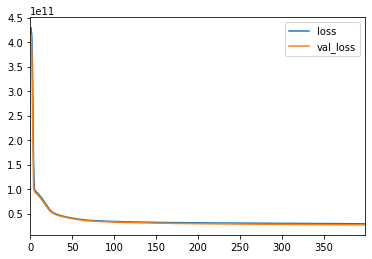

In [58]:
losses.plot()

#### Predicting on Brand New Data

In [60]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [61]:
predictions = model.predict(X_test)

In [62]:
mean_absolute_error(y_test,predictions)

101093.14769121335

In [63]:
np.sqrt(mean_squared_error(y_test,predictions))

164044.20383689634

In [64]:
explained_variance_score(y_test,predictions)

0.7970810085678334

In [65]:
df['price'].mean()

540296.5735055795

In [66]:
df['price'].median()

450000.0

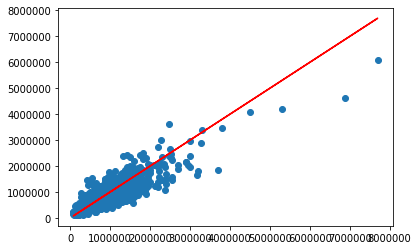

In [67]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [68]:
errors = y_test.values.reshape(6480, 1) - predictions

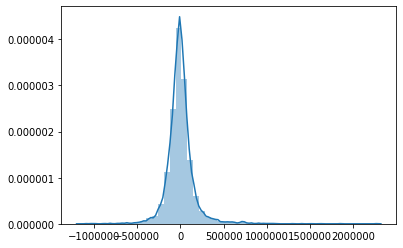

In [69]:
sns.distplot(errors)

-------------
### Predicting on a brand new house

In [70]:
single_house = df.drop('price',axis=1).iloc[0]

In [71]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [72]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

In [73]:
model.predict(single_house)

array([[273948.47]], dtype=float32)

In [74]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64